In [369]:
import scipy as sc
from scipy import optimize
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [370]:
q = 1378
q_IK = 237
h = (6371+763.2)/6371
Lt = 12*3600
R = 6371
G = 6.67*10**-11
M = 5.97*10**24
F = 30
sigma = 5.67*10**(-8)
m = 70.5
c = 1000
T = 6000
eps_top = 0.85
As_top = 0.85
eps_bot = 0.1
As_bot = 0.90
Alb = 0.3
theta = np.abs(Lt/3600-6)/24.0*np.pi*2
def f12(beta):
    if beta <= np.arccos(1/h):
        return np.cos(beta)/h**2
    elif beta >= np.pi - np.arccos(1/h):
        return 0
    else:
        x = (h**2-1)**0.5
        y = -x/np.tan(beta)
        return 1.0/np.pi*(
            (np.cos(beta)*np.arccos(y)-x*np.sin(beta)*(1-y**2)**0.5)/h**2 + np.arctan(np.sin(beta)*(1-y**2)**0.5/x)
            )


0.3047967551793229


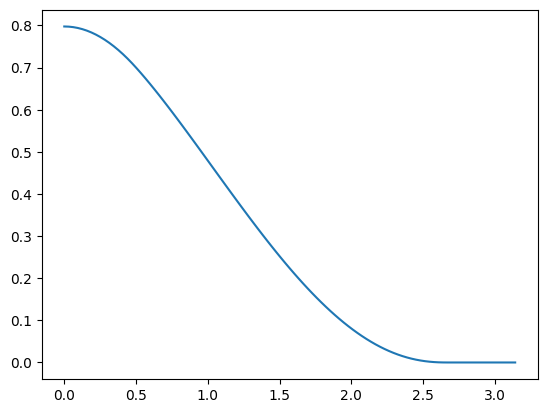

In [371]:
x = [float(np.pi/100*i) for i in range (0, 101)]
y = [f12(x[i]) for i in range (len(x))]
plt.plot(x,y)
result = 0

theta = np.abs(Lt/3600-6)/24.0*np.pi*2

X = (h**2 - 1)**0.5 
if Lt == 3600 * 6:
    result = 1/np.pi *(np.arctan(1/X)-X/h**2)
elif Lt == 3600 * 9:
     result = (integrate.quad(f12, 0, np.pi)[0]/np.pi+1/np.pi *(np.arctan(1/X)-X/h**2))/2
else:
    result = integrate.quad(f12, 0, np.pi)[0]/np.pi

K= result  
print(K)
K12 = integrate.quad(f12, 0, np.pi)[0]/np.pi  

In [373]:
def get_q_solar(LTAN,T,bl):
    r = ((G*M*T**2)/(4*np.pi**2))**(1/3)/1000
    theta = np.abs(LTAN-6)/24.0*np.pi*2
    a = r
    c = R
    b = a * np.cos(theta)
    if (b >= c):
        return q * As_top
    y = ((c**2 / a**2 * b**2 - b**2) / (b**2/a**2 - 1))**0.5
    beta = np.arccos(y / R)
    alpha = np.arcsin(np.sin(beta) * R / r)
    T_night = alpha / np.pi*T

    if(bl == True):
       return (1 - T_night/T)*q*As_top
    else:
       return T_night

result = get_q_solar(Lt/3600,6000,True)
print(result)




759.6862664971096


In [374]:
def get_Albedo(LTAN):
    theta = np.abs(LTAN-6)/24.0*np.pi*2
    
    return K12 * 0.3 * q * 2/np.pi * np.sin(theta)**2 

result = get_Albedo(Lt/3600)
result


80.21598754832374

In [375]:

LTAN = Lt/3600
q_S_top = get_q_solar(LTAN,T,True)
q_IR_top = K*q_IK * eps_top
Q_top = (q_S_top + q_IR_top) * F
print (Q_top)


q_IR_bot = K*q_IK * eps_bot
q_ALB_bot = get_Albedo(LTAN) * As_bot
Q_bot = (q_IR_bot + q_ALB_bot) * F
print (Q_bot)



24632.627184839526
2382.5421567372396


In [376]:
T_night = get_q_solar(LTAN,T,False)
T_day = T - get_q_solar(LTAN,T,False)
print("T_night =", get_q_solar(LTAN,T,False))
print("T_day =", T - get_q_solar(LTAN,T,False))

T_night = 2108.496884672879
T_day = 3891.503115327121


In [377]:
kl = integrate.quad(f12, 0, np.pi/2)[0]/(np.pi/2)
kd = integrate.quad(f12, np.pi/2, np.pi)[0]/(np.pi/2)
kef = kl+kd
print (kl)
print (kd)
print (kef)
print (K)

0.5586453578159299
0.05094815254271586
0.6095935103586458
0.3047967551793229


In [379]:
 #Q_top =((1377*As_top)*T_day + (237*0.051*eps_top)*T/2 + (237*0.56*eps_top)*T/2)*F/T
T_av_top = (Q_top/(sigma*eps_top*F))**0.25
T_av_top-273.15

88.13245686413103

In [380]:
 #Q_bot = ((q_IK*kl*eps_bot)*T/2 + (kl*0.3*q*As_bot/(np.pi/2))*T/2 + (q_IK*kd*eps_bot)*T/2)*F/T
T_av_bot = (Q_bot/(sigma*eps_bot*F))**0.25
T_av_bot-273.15

70.87029984553368

In [381]:
lymbda = 85
delta = 2*10e-3

def f(x):
    x = np.array(x)
    return np.array([
        Q_top/F + (-x[0]+x[1])* lymbda/(delta)  - eps_top*sigma*(x[0])**4  - 1.0,
        Q_bot/F + (x[0]-x[1])* lymbda/(delta)  - eps_bot*sigma*(x[1])**4  - 1.0
        ])

solution = optimize.root(f, x0 = [361, 227])  
print(solution.x - 273.15)  

[86.23009572 86.22629387]


In [382]:
res = (delta/lymbda)/F
res

7.84313725490196e-06

In [383]:
p = 2350 
h1 = 0.001

As = 0.85
eps = 0.85

t1 = T_day    #    65*60    
t2 = T_night  #    35*60     



eps_top = eps
eps_bot = eps
As_top = As
As_bot = As


q1 = (q_IK*kd*eps_top + q*As_top) 
q2 = (q_IK*kl*eps_top)                 


sigma = 5.67e-8

In [384]:
q2

112.53910733201909

In [385]:
C = p*h1*c
A = q2 
B = q1
D = eps*sigma

In [386]:
a = (A/C) ** 0.25 
b = (B/C) ** 0.25
d = (D/C) ** 0.25


In [387]:
alpha = a/d 
beta = b/d

In [388]:
def post1(t, T0, T1):
    arc0 = 2*np.arctan(T0/alpha) 
    arc1 = 2*np.arctan(T1/alpha) 
    tad = 4*t*alpha**3*d**4
    step = tad + arc0 - arc1
    exp = np.exp(step)
    
    exp *= (T0+alpha) / (T0-alpha)
    return (alpha+exp*alpha)/(exp-1.0)
    

def post0(t, T0, T1): 
    arc0 = 2*np.arctan(T0/beta)
    arc1 = 2*np.arctan(T1/beta)
    tad = 4*t*beta**3*d**4
    step = tad - arc0 + arc1
    exp = np.exp(step)
    
    exp *= (T1+beta)/(T1-beta)
    return (beta+exp*beta)/(exp-1.0)

In [389]:
Temp0 = 300
Temp1 = 300
Temp0_new = Temp0-1
Temp1_new = Temp1-1
while(abs(Temp0-Temp0_new) > 0.001 or abs(Temp1-Temp1_new) > 0.001):
    Temp0_new = post0(t1, Temp0, Temp1)
    Temp1_new = post1(t2, Temp0, Temp1)
    Temp0 = Temp0 + (Temp0_new - Temp0)*0.1
    Temp1 = Temp1 + (Temp1_new - Temp1)*0.1
    print(Temp0, Temp1)


309.5697923000701 293.08939094186945
318.1826053661698 286.9190730642749
325.9341371217867 281.40100583438846
332.9105156980912 276.4599050811808
339.1892564131611 272.03079275372846
344.8401230532844 268.0571668352909
349.9259030261326 264.4896003895715
354.50310499861746 261.2846453213946
358.62258677096304 258.4039578031733
362.3301203633709 255.81358862604188
365.6669005940198 253.48339884258735
368.6700027992658 251.3865724321102
371.3727947818229 249.49920542110937
373.80530756412634 247.79995621197236
375.9945690663593 246.26974561532472
377.9649044166779 244.89149775997947
379.7382062304135 243.64991500329734
381.3341778613552 242.5312814052836
382.7705523279043 241.52329041064897
384.06328934661303 240.61489320584866
385.22675266236996 239.79616485304436
386.2738696455667 239.05818579929468
387.21627492954804 238.39293675210928
388.0644396843169 237.79320522700576
388.82778796286925 237.25250232724915
389.51480141289505 236.76498852405388
390.13311351730937 236.32540737726282


In [390]:
print(Temp1-273.15)
print(Temp0-273.15)

-40.867498348565476
122.54693762690346
